# AMATH Scientific Computing
## Homework-2
### Manjaree Binjolkar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import copy
#%matplotlib notebook
from matplotlib import cm

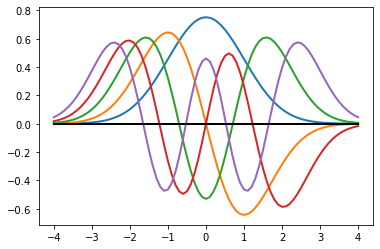

In [2]:
#Q1 Define ODE
def rhsfunc(t, y, beta):
    f1 = y[1] #f1 = y1'= y2 = phi'
    K = 1
    n0 = K*t*t #n(x) = x*x (here t is the independent variable)
    f2 = (n0 - epsilon)*y[0]#this changes #f2 = y2' = phi"
    return np.array([f1, f2])

# Define some constants
#n0 = 0 #defined inside the function
L = 4 
xp = [-L,L] # xspan
tol = 1e-6 # We want to find beta such that |y(x=1)| < tol
K = 1
# Define our initial conditions
A = 1 # This is the shooting-method parameter that we will change , y1_(-1) = A

#y0 = np.array([A, 1]) # y1_(-1) = A, y2_(-1) = 1 #do I need to keep updating A?

epsilon_start = 0 # This is our initial beta value, we will change it, 
#recommended on piazza to start from epsilon = 0
eigen_values=[]
eigen_functions=[]

# Make a loop over beta values to find more eigenvalue-eigenfunction pairs
#modes is another way to say eigenfunction
for modes in range(5): # Try to find 5 modes
    epsilon = epsilon_start 
    depsilon = 0.01 # This is the amount we will decrease beta by each time we don't have an eigenvalue
                 # until we get an eigenvalue

    
    for j in range(1000):
        x_evals = np.linspace(-L, L, (20*L)+1) #20L + 1 linearly spaced points in between
        #update/define y0 again
        y0 = np.array([A, A*np.sqrt(K*L*L-epsilon)])
        
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc(x, y, epsilon), xp, y0, t_eval = x_evals)
        
        y_sol = sol.y[0, :] #gives phi

        y_sol_1 =sol.y[1,:] #gives phi'

        if np.abs(y_sol_1[-1]+np.sqrt(K*L*L-epsilon)*y_sol[-1]) < tol:
            #the boundary condition at phi'(x=L) should be limited to be less than here
            #phi'(L) = - sqrt(epsilon)*phi(L) -->given < tol
            #print(r'We got the eigenvalue! $\epsilon = $', epsilon)
            eigen_values.append(epsilon)
            break

        if (-1)**(modes)*(y_sol_1[-1]+np.sqrt(K*L*L-epsilon)*y_sol[-1]) > 0:
            #phi'(L) = - sqrt(KL^2 - epsilon)*phi(L)
            epsilon = epsilon + depsilon 
            # Decrease beta if y(1)>0, because we know that y(1)>0 for beta = beta_start
        else:
            epsilon = epsilon - depsilon/2  # Increase beta by a smaller amount if y(1)<0
            depsilon = depsilon/2 # Cut dbeta in half to make we converge


    epsilon_start = epsilon + 0.1 # increase beta once we have found one mode.

    y_norm = scipy.integrate.trapz(y_sol**2,x=x_evals)
    y_sol_final = y_sol/np.sqrt(y_norm)
    eigen_functions.append(y_sol_final)
    plt.plot(sol.t, y_sol_final, linewidth=2)
    plt.plot(sol.t, 0*sol.t, 'k')

In [3]:
eigen_functions = np.asarray(eigen_functions)
np.shape(eigen_functions.T)

(81, 5)

In [4]:
#print(np.shape(eigen_functions))
#print(eigen_functions)
#eigen_functions[0].reshape(81,1).T
#np.shape(eigen_functions[0].reshape(81,1).T)

In [5]:
A1 = copy.deepcopy(np.abs(eigen_functions[0]).reshape(81,1))
#print(A1)
#print(np.shape(A1))
A2 = copy.deepcopy(np.abs(eigen_functions[1]).reshape(81,1))
#print(A2)
#print(np.shape(A2))
A3 = copy.deepcopy(np.abs(eigen_functions[2]).reshape(81,1))
#print(A3)
#print(np.shape(A3))
A4 = copy.deepcopy(np.abs(eigen_functions[3]).reshape(81,1))
#print(A4)
#print(np.shape(A4))
A5 = copy.deepcopy(np.abs(eigen_functions[4]).reshape(81,1))
#print(A5)
#print(np.shape(A5))
A6_temp = np.asarray(eigen_values)
#print(type(A6_temp))
A6 = copy.deepcopy(A6_temp.reshape(5,1).T)
#print(np.shape(A6))

In [6]:
#eigen_functions

(100, 81)
(100, 81)
(100, 5)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

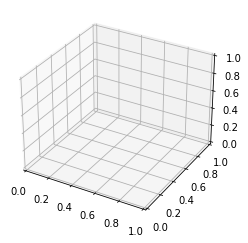

In [8]:
## 3D Plot

#defining the axes
dx = np.linspace(-4, 4, 81)
dt = np.linspace(0, 5, 100)

#calculating the density function
density_func = (np.asarray(eigen_functions[:, 1]).reshape(-1, 1) * np.cos(eigen_values[1]*dt/2)).T



fig = plt.figure()
ax = plt.axes(projection = '3d')
X, T = np.meshgrid(dx, dt)
print(np.shape(X))
print(np.shape(T))
print(np.shape(density_func))
surf = ax.plot_surface(X, T, density_func, cstride=1, rstride=1, cmap = cm.hsv)
fig.colorbar(surf, pad = 0.2)
ax.contour(X, T, density,  offset = -0.6, cmap = cm.hsv)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\psi_2(x, t)$')
plt.title(r'Time Evolution of Probability Density Function $\psi_2(x, t)$')

In [ ]:
#Q2

K = 1
L = 4
xp = [-L, L]
tol = 1e-6
x = np.linspace(-L,L,20*L+1)
dx = 0.1

# setting up the matrix N
Dn = 2*np.ones(20*L-1)
Un = -1*np.ones(20*L-2)
Ln = -1*np.ones(20*L-2)

N = (1/dx**2) * np.diag(Dn) + (1/dx**2) * np.diag(Un, 1) + (1/dx**2) * np.diag(Ln, -1)

#boundary conditions
N[0,0:2] = [2/3/dx**2,-2/3/dx**2]
N[78,77:79] = [-2/3/dx**2,2/3/dx**2]

#filling in 
iters = 20*L-1
for i in range(iters) : 
    N[i,i] = N[i,i] + K*(x[i+1])**2
#print(N)

# sort eigenvalues and eigenvectors 
D1, V1 = np.linalg.eig(N)
index1 = D1.argsort()[::1]   
D = D1[index1]
#print(D)
V = V1[:,index1]
#print(w)

V_0 = np.zeros(5)
V_81 = np.zeros(5)
V_norm = []

for i in range(5):
    V_0[i] = (4*V[0,i]-V[1,i])/(2*dx*np.sqrt(K*L**2-D[i])+3)
    V_81[i] = (V[77,i]-4*V[78,i])/(-2*dx*np.sqrt(K*L**2-D[i])-3)
    
    V_temp = np.append(V_0[i] ,V[:,i])
    V_final = np.append(V_temp, V_81[i])
    
    #norm = scipy.integrate.trapz(V_final*V_final,x
    
    V_norm_temp = (V_final / np.sqrt(scipy.integrate.trapz(V_final**2,x)))*(-1)
    V_norm.append(V_norm_temp.reshape(-1,1))
    #plt.plot(sol.t, y_sol_final, linewidth=2)
    #plt.plot(sol.t, 0*sol.t, 'k')

In [ ]:
#V_norm_0 = np.abs(V_norm[0])
#np.shape(V_norm_0)

In [ ]:
x = np.linspace(-4, 4, 20*4+1)
fig, ax = plt.subplots()
ax.plot(x, V_norm[0], linewidth=3)
ax.plot(x, V_norm[1], linewidth=3)
ax.plot(x, V_norm[2], linewidth=3)
ax.plot(x, V_norm[3], linewidth=3)
ax.plot(x, V_norm[4], linewidth=3)
ax.legend([r"$\phi_1$", r"$\phi_2$",  r"$\phi_3$",  r"$\phi_4$", r"$\phi_5$"])

In [ ]:
#V_norm

In [ ]:
#final answers
A7 = copy.deepcopy(np.abs(V_norm[0]))
A8 = copy.deepcopy(np.abs(V_norm[1]))
A9 = copy.deepcopy(np.abs(V_norm[2]))
A10 = copy.deepcopy(np.abs(V_norm[3]))
A11 = copy.deepcopy(np.abs(V_norm[4]))

In [ ]:
#np.shape(D)

In [ ]:
A12_temp = np.asarray(D[0:5])
#print(type(A6_temp))
A12 = copy.deepcopy(A12_temp.reshape(5,1).T)
#print(np.shape(A6))
#A12

In [ ]:
#A12 = D[0:5]
#np.shape(A12)
#print(np.shape(A12))
#A12

In [ ]:
#checks from gradescope
#print(np.mean(A7-A1))
#print(np.mean(A8-A2))
#print(np.mean(A9-A3))
#print(np.mean(A10-A4))
#print(np.mean(A11-A5))

In [ ]:
#Q3
# Define ODE
def rhsfunc1(t, y, beta,gamma):
    f1 = y[1] #f1 = y1'= y2 = phi'
    K = 1
    n0 = K*t*t #n(x) = x*x (here t is the independent variable)
    f2 = (gamma*y[0]*y[0]+n0 - epsilon)*y[0]#this changes #f2 = y2' = phi"
    return np.array([f1, f2])

# Define some constants
#n0 = 0 #defined inside the function
# Define our initial conditions
#A = 1 # This is the shooting-method parameter that we will change , y1_(-1) = A
#y0 = np.array([A, 1]) # y1_(-1) = A, y2_(-1) = 1 #do I need to keep updating A? yes!
L = 3 
xp = [-L,L] # xspan
tol = 1e-5 # We want to find beta such that |y(x=1)| < tol
K = 1
epsilon_start = 0 # This is our initial beta value, we will change it#recommended on piazza to start from epsilon = 0
A_start = 0.001
gamma = 0.05

eigen_values_q3_A = []
eigen_functions_q3_A = []

# Make a loop over beta values to find more eigenvalue-eigenfunction pairs
#modes is another way to say eigenfunction

for modes in range(2): # Try to find 5 modes
    epsilon = epsilon_start 
    depsilon = 0.01 # This is the amount we will decrease beta by each time we don't have an eigenvalue
                 # until we get an eigenvalue
    A =A_start
     
    for j in range(1000):
        x_evals = np.linspace(-L, L, (20*L)+1) #20L + 1 linearly spaced points in between
        
        #update/define y0 again, initial conditions
        y0 = np.array([A, A*np.sqrt(K*L*L-epsilon)])
        
        ##check
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc1(x, y, epsilon,gamma), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0, :] #gives phi
        y_sol_1 =sol.y[1,:] #gives phi'
        
        
        #compute norm and boundary condition
        norm = scipy.integrate.trapz(y_sol**2,x=x_evals)
        BC = y_sol_1[-1]+(np.sqrt(K*L*L-epsilon)*y_sol[-1]) #don't multiply by A boundary condition

            
        #checking both conditions
        if np.abs(BC) < tol and np.abs(norm - 1) < tol :
            #the boundary condition at phi'(x=L) should be limited to be less than here
            #phi'(L) = - sqrt(epsilon)*phi(L) -->given < tol
            #print(r'We got the eigenvalue! $\epsilon = $', epsilon)
            eigen_values_q3_A.append(epsilon)
            break
        else:
            #update initial condition with new A
            A = A/np.sqrt(norm)
        
        #update/define y0 again, initial conditions
        y0 = np.array([A, A*np.sqrt(K*L*L-epsilon)])
        
        #solving ode
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc1(x, y, epsilon,gamma), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0, :] #gives phi
        y_sol_1 =sol.y[1,:] #gives phi'
        
        #compute norm and boundary condition
        norm = scipy.integrate.trapz(y_sol**2,x=x_evals)
        BC = y_sol_1[-1]+(np.sqrt(K*L*L-epsilon)*y_sol[-1]) #don't multiply by A boundary condition
      
        #checking both conditions
        if np.abs(BC) < tol and np.abs(norm - 1) < tol:
            #the boundary condition at phi'(x=L) should be limited to be less than here
            #phi'(L) = - sqrt(epsilon)*phi(L) -->given < tol
            #print(r'We got the eigenvalue! $\epsilon = $', epsilon)
            eigen_values_q3_A.append(epsilon)
            break
       
        #shooting for BC
        if (-1)**(modes)*(BC) > 0:
            
            #phi'(L) = - sqrt(KL^2 - epsilon)*phi(L)
            epsilon = epsilon + depsilon 
            # Decrease beta if y(1)>0, because we know that y(1)>0 for beta = beta_start
            
        else:
            epsilon = epsilon - depsilon/2  # Increase beta by a smaller amount if y(1)<0
            depsilon = depsilon/2 # Cut dbeta in half to make we converge


            
    epsilon_start = epsilon + 0.1 # increase beta once we have found one mode.

    
    eigen_functions_q3_A.append(y_sol)
    
    #plt.plot(sol.t, eigen_functions_q3_A, linewidth=2)
    #plt.plot(sol.t, 0*sol.t, 'k')

In [ ]:
#A13 = eigen_functions_q3_A[0]
#A14 = eigen_functions_q3_A[1]
#eigen_values_q3_A

In [ ]:
#final answer
A13 = copy.deepcopy((np.abs(eigen_functions_q3_A[0])).reshape(61,1))
A14 = copy.deepcopy((np.abs(eigen_functions_q3_A[1])).reshape(61,1))
#A15 = eigen_values_q3_A
#np.shape(A13)

In [ ]:
A15_temp = np.asarray(eigen_values_q3_A)
#print(np.shape(A18_temp))
A15 = copy.deepcopy(A15_temp.reshape(2,1).T)
#print(np.shape(A15))

In [ ]:
#np.shape(A13)

In [ ]:
#type(A13)
#A13

In [ ]:
# Define ODE
#def rhsfunc1(t, y, beta,gamma):
    #f1 = y[1] #f1 = y1'= y2 = phi'
    #K = 1
    #n0 = K*t*t #n(x) = x*x (here t is the independent variable)
    #f2 = (gamma*y[0]*y[0]+n0 - epsilon)*y[0]#this changes #f2 = y2' = phi"
    #return np.array([f1, f2])

# Define some constants
#n0 = 0 #defined inside the function
# Define our initial conditions
#A = 1 # This is the shooting-method parameter that we will change , y1_(-1) = A
#y0 = np.array([A, 1]) # y1_(-1) = A, y2_(-1) = 1 #do I need to keep updating A? yes!
L = 3 
xp = [-L,L] # xspan
tol = 1e-5 # We want to find beta such that |y(x=1)| < tol
K = 1
epsilon_start = 0 # This is our initial beta value, we will change it#recommended on piazza to start from epsilon = 0
A_start = 0.001
gamma = -0.05

eigen_values_q3_B = []
eigen_functions_q3_B = []

# Make a loop over beta values to find more eigenvalue-eigenfunction pairs
#modes is another way to say eigenfunction

for modes in range(2): # Try to find 5 modes
    epsilon = epsilon_start 
    depsilon = 0.01 # This is the amount we will decrease beta by each time we don't have an eigenvalue
                 # until we get an eigenvalue
    A =A_start
     
    for j in range(1000):
        x_evals = np.linspace(-L, L, (20*L)+1) #20L + 1 linearly spaced points in between
        
        #update/define y0 again, initial conditions
        y0 = np.array([A, A*np.sqrt(K*L*L-epsilon)])
        
        ##check
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc1(x, y, epsilon,gamma), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0, :] #gives phi
        y_sol_1 =sol.y[1,:] #gives phi'
        
        
        #compute norm and boundary condition
        norm = scipy.integrate.trapz(y_sol**2,x=x_evals)
        BC = y_sol_1[-1]+(np.sqrt(K*L*L-epsilon)*y_sol[-1]) #don't multiply by A boundary condition

            
        #checking both conditions
        if np.abs(BC) < tol and np.abs(norm - 1) < tol :
            #the boundary condition at phi'(x=L) should be limited to be less than here
            #phi'(L) = - sqrt(epsilon)*phi(L) -->given < tol
            #print(r'We got the eigenvalue! $\epsilon = $', epsilon)
            eigen_values_q3_B.append(epsilon)
            break
        else:
            #update initial condition with new A
            A = A/np.sqrt(norm)
        
        #update/define y0 again, initial conditions
        y0 = np.array([A, A*np.sqrt(K*L*L-epsilon)])
        
        #solving ode
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc1(x, y, epsilon,gamma), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0, :] #gives phi
        y_sol_1 =sol.y[1,:] #gives phi'
        
        #compute norm and boundary condition
        norm = scipy.integrate.trapz(y_sol**2,x=x_evals)
        BC = y_sol_1[-1]+(np.sqrt(K*L*L-epsilon)*y_sol[-1]) #don't multiply by A boundary condition
      
        #checking both conditions
        if np.abs(BC) < tol and np.abs(norm - 1) < tol:
            #the boundary condition at phi'(x=L) should be limited to be less than here
            #phi'(L) = - sqrt(epsilon)*phi(L) -->given < tol
            #print(r'We got the eigenvalue! $\epsilon = $', epsilon)
            eigen_values_q3_B.append(epsilon)
            break
       
        #shooting for BC
        if (-1)**(modes)*(BC) > 0:
            
            #phi'(L) = - sqrt(KL^2 - epsilon)*phi(L)
            epsilon = epsilon + depsilon 
            # Decrease beta if y(1)>0, because we know that y(1)>0 for beta = beta_start
            
        else:
            epsilon = epsilon - depsilon/2  # Increase beta by a smaller amount if y(1)<0
            depsilon = depsilon/2 # Cut dbeta in half to make we converge


            
    epsilon_start = epsilon + 0.1 # increase beta once we have found one mode.

    
    eigen_functions_q3_B.append(y_sol)
    
    #plt.plot(sol.t, eigen_functions_q3_A, linewidth=2)
    #plt.plot(sol.t, 0*sol.t, 'k')

In [ ]:
#np.shape(eigen_functions_q3_B)

In [ ]:
#A16 = eigen_functions_q3_B[0]
#A17 = eigen_functions_q3_B[1]
#np.shape(eigen_values_q3_B)

In [ ]:
#final answer
A16 = copy.deepcopy((np.abs(eigen_functions_q3_B[0])).reshape(61,1))
A17 = copy.deepcopy((np.abs(eigen_functions_q3_B[1])).reshape(61,1))
#np.shape(A16)

In [ ]:
A18_temp = np.asarray(eigen_values_q3_B)
#print(np.shape(A18_temp))
A18 = copy.deepcopy(A18_temp.reshape(2,1).T)
#print(np.shape(A18))

In [ ]:
L = 4
x = np.linspace(-L, L, 20*L+1)
fig, ax = plt.subplots()
ax.plot(x, eigen_functions[0], linewidth=2)
ax.plot(x, eigen_functions[1], linewidth=2)
ax.plot(x, eigen_functions[2], linewidth=2)
ax.plot(x, eigen_functions[3], linewidth=2)
ax.plot(x, eigen_functions[4], linewidth=2)

ax.legend([r"$\phi_1$", r"$\phi_2$",  r"$\phi_3$",  r"$\phi_4$", r"$\phi_5$"])
fig.suptitle('Fig 1. Eigenfunctions for linear equation', fontsize=16)
plt.ylabel('$\phi$', fontsize=16)
plt.xlabel('x', fontsize=16)
fig.savefig('linear.jpg');

In [ ]:
np.shape(x)

In [ ]:
np.shape(eigen_functions[4])

In [ ]:
np.shape(eigen_functions_q3_A[0])

In [ ]:
x1 = np.linspace(-3, 3, 20*3+1)
fig, ax = plt.subplots()
ax.plot(x1, eigen_functions_q3_A[0], linewidth=2)
ax.plot(x1, eigen_functions_q3_A[1], linewidth=2)
#ax.plot(x1, eigen_functions_q3_B[0], linewidth=2)
#ax.plot(x1, eigen_functions_q3_B[1], linewidth=2)
ax.legend([
           r"$\phi_1$ for $\gamma$ =0.05",
           r"$\phi_2$ for $\gamma$ =0.05",
           #r"$\phi_1$ for $\gamma$ =-0.05",
           #r"$\phi_2$ for $\gamma$ =-0.05"
          ])
#ax.title("Eigenfunctions for gamma")
fig.suptitle('Fig 2. Eigenfunctions for non linear equation', fontsize=16)
plt.ylabel('$\phi$', fontsize=16)
plt.xlabel('x', fontsize=16)
fig.savefig('gammaA.jpg');

In [ ]:
x1 = np.linspace(-3, 3, 20*3+1)
fig, ax = plt.subplots()
#ax.plot(x1, eigen_functions_q3_A[0], linewidth=2)
#ax.plot(x1, eigen_functions_q3_A[1], linewidth=2)
ax.plot(x1, eigen_functions_q3_B[0], linewidth=2)
ax.plot(x1, eigen_functions_q3_B[1], linewidth=2)
ax.legend([
           #r"$\phi_1$ for $\gamma$ =0.05",
           #r"$\phi_2$ for $\gamma$ =0.05",
           r"$\phi_1$ for $\gamma$ =-0.05",
           r"$\phi_2$ for $\gamma$ =-0.05"
          ])
#ax.title("Eigenfunctions for gamma")
fig.suptitle('Fig 3. Eigenfunctions for non linear equation', fontsize=16)
plt.ylabel('$\phi$', fontsize=16)
plt.xlabel('x', fontsize=16)
fig.savefig('gammaB.jpg');